**產品迭代與長期趨勢分析**

長期趨勢分析幫助遊戲開發者理解產品的迭代效果，追蹤遊戲在市場中的持續表現。這一部分重點關注遊戲的更新、產品週期及玩家反饋的長期影響。

- 核心分析項目：
- 產品更新與市場反應：通過追蹤遊戲的更新記錄與玩家反饋，了解產品迭代是否提高了玩家參與度和評價。
- 長期趨勢：分析遊戲的評分、評論數、銷量、收入等隨時間的變化，評估遊戲是否持續吸引新玩家或留住現有玩家。
- **對應欄位：**
- history.score, history.reviews, history.revenue, history.timeStamp
- **建議圖表：**
- 折線圖：展示評分、評論數隨時間的變化。
- 雙軸圖：同時展示銷量與收入的長期趨勢**。**

In [215]:

!pip install scipy


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 162.5 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 187.9 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 268.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.8 MB 1.6 MB/s eta 0:00:28
   ---------------------------------------- 0.2/44.8 MB 2.1 MB/s eta 0:00:22
   ---------------------------------------- 0.3/44.8 MB 2.5 MB/s eta 0:00:19
    --------------------------------------- 0.7/44.8 MB 3.8 MB/s eta 0:00:12
   - -------------------------------------- 1.2/44.8 MB 5.2 MB/s eta 0:00:09
   - -------------------------------------- 1.7/44.8 MB 6.4 MB/s eta 0:00:07
   

In [5]:

!pip install jsonlines

  Using cached jsonlines-4.0.0-py3-none-any.whl.metadata (1.6 kB)
Using cached jsonlines-4.0.0-py3-none-any.whl (8.7 kB)


In [6]:
import json
import numpy as np
import pandas as pd
from datetime import datetime
import jsonlines
import pprint as pp
from sklearn.preprocessing import MinMaxScaler


In [40]:
with jsonlines.open('data.json') as reader:
    for obj in reader:
        if obj["_source"]["name"] == "Lost Ark":
            data = obj["_source"]["history"]
            break
    for item in data:
        print(item["players"])

0
0
0
0
0
0
0
0
0
444113.84835602256
354902.74054778635
489019.5404574036
465780.0617395471
214628.94267851525
168338.73112248766
149088.638301178
156387.24008893734
189628.1169791487
269486.07797195436
302999.5
284441.5714285714
222220.7142857143
301474
299337
314434
313681
284122
92763
62979
102398
129032
154917
167049
162112
162335
60516
82387
68935
114598
125017
119199
114728
87992
135999
143907
155554
161555
161973
152836
111739
168183
176918
184355
188764
186223
180645
83035
150026
192108
207234
212327
200723
176435
106590
163714
171519
182857
185218
181413
166368
109026
185436
193580
190216
192297
178139
163073
137647
180258
185577
194385
194827
175945
137839
134285
168321
150210
131974.42857142858
118643
113043.625
91863.71428571429
52560.75
77280.57142857143
94966.85714285714
96055.5
91486.125
86569.375
86728
57130.57142857143
75041
80071.33333333333
83487
84630.85714285714
66326.85714285714
79263.28571428571
62340.5
77616.125
73856.25
78852
88632.66666666667
80381.57142857143

In [13]:
count = 0
F2P_count=0
non_count=0
F2P_games = []
non_F2P_game = []
F2P_id = []
non_F2P_id = []

with jsonlines.open('data.json') as reader:
    for obj in reader:
        if "Free To Play" in obj["_source"]["genres"]:
            F2P_count+=1
            F2P_games.append(obj["_source"])
            

        elif "Free To Play" not in obj["_source"]["genres"]:
            non_count+=1
            non_F2P_game.append(obj["_source"])
            # print(obj["_source"]["history"])
        count+=1
        # print(count)

In [14]:
print(f"F2P_count: {F2P_count}, {len(F2P_games)}")
print(f"non_count: {non_count}, {len(non_F2P_game)}")
print(f"total_count: {count}")

print(F2P_games[0]["releaseDate"])

F2P_count: 2593, 2593
non_count: 7743, 7743
total_count: 10336
1595563200000


In [15]:
def game_to_df(obj, tar_feature):
    # print(relative_timeline)
    game_data = [{"time":item["timeStamp"], obj["name"]: item.get(tar_feature, None)} for item in obj["history"]]
    # game_data
    df = pd.DataFrame(game_data)
 
    df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d %H:%M:%S")

    df["time"] = (df["time"] - df["time"].min()).dt.days

    # 先創建一個新的列表示每30天的周期
    df['time_period'] = (df['time'] // 30) * 30
    # 使用 groupby 按照每30天的時間段進行彙總，這裡我們使用平均值
    df_grouped = df.groupby('time_period').agg({obj["name"]: 'mean'}).reset_index()
    # df_grouped['Gain(%)'] = (df_grouped[obj["name"]]-df_grouped[obj["name"]].shift(1))
    # min_val = df_grouped[obj["name"]].min()
    # max_val = df_grouped[obj["name"]].max()
    # df_grouped[obj["name"]] = (df_grouped[obj["name"]] - min_val) / (max_val - min_val)
    
    return df_grouped

In [ ]:
game_to_df(F2P_games[2], 'players')

In [17]:
def games_list_to_df(game_obj):
    count=0
    dfs = []  # 用來存儲每次 game_to_df 的結果
    for item in game_obj:
        df = game_to_df(item, 'players')
        count+=1
        print(count)
        dfs.append(df)
       
    # 初始化一個合併的 DataFrame
    df_combined = dfs[0]
    print('done!')
    # 將剩下的 DataFrame 合併到一起
    count=0
    for df in dfs[1:]:
        print('combined start')
        df_combined = df_combined.merge(df, on='time_period', how='outer', suffixes=(None, '_other'))
        count+=1
        print(count)

    # 查看合併後的 DataFrame
    df_combined=df_combined.set_index('time_period')
    # 計算每個列的平均值
    column_means = df_combined.mean(axis=0)

    # 將平均值作為新行添加到 DataFrame 中
    df_combined.loc['mean'] = column_means

    # 根據 'mean' 行的數值對列進行排序
    df_combined = df_combined.sort_values(by='mean', axis=1, ascending=False)
    # df_combined['count'] = df_combined.count(axis=1)
    # print(df_combined[['mean','std']])
    return df_combined



In [18]:
# 
df_f2p = games_list_to_df(F2P_games)
# 假設 df 是你的 DataFrame


# 對所有的 columns 進行 min-max 標準化



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
df_f2p = games_list_to_df(F2P_games)

In [20]:
df_f2p

,PUBG: BATTLEGROUNDS,Apex Legends™,Once Human,Lost Ark,Destiny 2,The First Descendant,MIR4,Yu-Gi-Oh! Master Duel,THE FINALS,Overwatch® 2,...,Fast & Blast,TIME HUNTERS: ミクイ黄金像の呪い,JetpacToo,LabyrInk,东方雪人战争-TouhouSnowClash,Eight Winds,Hidden Among Thieves,Camp Wars,缘起,国之战魂
time_period,,,,,,,,,,,,,,,,,,,,,
0,17573.971255,74948.002223,141412.355238,0.000000,165308.213873,124324.551190,11103.244970,162227.708788,117986.638563,25240.104762,...,0.012500,0.016741,0.009852,0.000000,0.021104,0.008333,0.000000,0.000000,0.004167,0.0
30,69796.431803,64481.844188,97690.435550,0.000000,127028.738156,57276.844444,30900.426963,87068.613055,48685.599802,17353.926587,...,0.009852,0.011060,0.013690,0.012500,0.000000,0.004608,0.000000,0.000000,0.000000,0.0
60,107442.849571,71848.175970,67347.321208,0.000000,107929.867983,28522.412302,46111.116209,49110.792804,21325.132398,20517.411310,...,0.000000,0.000000,0.004762,0.007812,0.000000,0.000000,0.005714,0.000000,0.003906,0.0
90,139905.690847,120987.251444,NaN,0.000000,92126.658429,15403.354167,78122.092811,36635.316521,21410.842474,20365.987685,...,0.000000,0.004310,0.004167,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0
120,229707.830887,126119.057084,NaN,0.000000,65950.194521,NaN,71491.583084,35690.604361,14424.984606,20498.916667,...,0.000000,0.000000,0.013095,0.016667,0.000000,0.000000,NaN,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:

def remove_outliner_droplow(df,limit):
    top_1000_columns = df.loc['mean'].sort_values(ascending=False).index[:limit]
    # 選擇前 1000 個列
    df_top_1000 = df[top_1000_columns]
    # df_top_1000['mean'] = df_top_1000.mean(axis=1)
    # df_top_1000['std'] = df_top_1000.std(axis=1)
    return df_top_1000.drop('mean', axis=0)

In [66]:
df_nf2p = games_list_to_df(non_F2P_game)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [71]:
df_top_1000_f2p = remove_outliner_droplow(df_f2p, int(len(F2P_games)/4))
df_top_1000_nf2p = remove_outliner_droplow(df_f2p, int(len(non_F2P_game)/4))
# df_top_1000_nf2p = remove_outliner_droplow(df_nf2p)
scaler = MinMaxScaler()
df_f2p_scaled = pd.DataFrame(scaler.fit_transform(df_top_1000_f2p), columns=df_top_1000_f2p.columns)
df_nf2p_scaled = pd.DataFrame(scaler.fit_transform(df_top_1000_nf2p), columns=df_top_1000_nf2p.columns)

df_f2p_scaled['mean'] = df_f2p_scaled.mean(axis=1)
df_f2p_scaled['std'] = df_f2p_scaled.std(axis=1)
df_nf2p_scaled['mean'] = df_nf2p_scaled.mean(axis=1)
df_nf2p_scaled['std'] = df_nf2p_scaled.std(axis=1)
df_nf2p_scaled

,PUBG: BATTLEGROUNDS,Apex Legends™,Once Human,Lost Ark,Destiny 2,The First Descendant,MIR4,Yu-Gi-Oh! Master Duel,THE FINALS,Overwatch® 2,...,全城警戒-世界大战一触即发，跪求指挥官！,Mist of the Dark,Prime Horror II,Soundscape VR: 2017,Stories One,World Senate,Let's Go Nuts!,Parcel Mania: Free Multiplayer Madness,mean,std
0,0.000000,0.053509,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,0.438732,...,1.000000,1.000000,0.235544,0.295397,1.000000,1.000000,0.105015,1.000000,0.709398,0.380913
1,0.033320,0.000000,0.409682,0.0,0.727378,0.384438,0.295397,0.488047,0.348178,0.000000,...,0.197838,0.070054,0.000000,0.181819,0.136902,0.359057,0.048958,0.934221,0.523612,0.348709
2,0.057340,0.037661,0.000000,0.0,0.591359,0.120445,0.522359,0.229495,0.090835,0.175994,...,0.016148,0.060046,1.000000,0.136365,0.069942,0.410350,0.020984,0.865030,0.407992,0.316630
3,0.078052,0.288888,NaN,0.0,0.478810,0.000000,1.000000,0.144517,0.091641,0.167570,...,0.076869,0.060046,0.695513,0.181819,0.030148,0.307761,0.014006,0.246515,0.341756,0.294828
4,0.135349,0.315124,NaN,0.0,0.292385,NaN,0.901065,0.138082,0.025934,0.174965,...,0.233156,0.050039,0.322783,0.090910,0.034018,0.205173,0.020961,0.597043,0.304407,0.283102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130674,0.206180
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.136918,0.232890
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.148898,0.238474
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158926,0.242471


In [72]:
df_f2p_scaled['mean'] = df_f2p_scaled.mean(axis=1)
df_f2p_scaled['std'] = df_f2p_scaled.std(axis=1)
df_nf2p_scaled['mean'] = df_nf2p_scaled.mean(axis=1)
df_nf2p_scaled['std'] = df_nf2p_scaled.std(axis=1)
df_std_mean_f2p = df_f2p_scaled[["mean","std"]]
df_std_mean_nf2p = df_nf2p_scaled[["mean","std"]]
df_std_mean_f2p


,mean,std
0,0.599456,0.414716
1,0.512766,0.361655
2,0.422851,0.332331
3,0.364370,0.302078
4,0.331701,0.284269
...,...,...
114,0.170599,0.221365
115,0.180338,0.257123
116,0.193060,0.261476
117,0.198943,0.252585


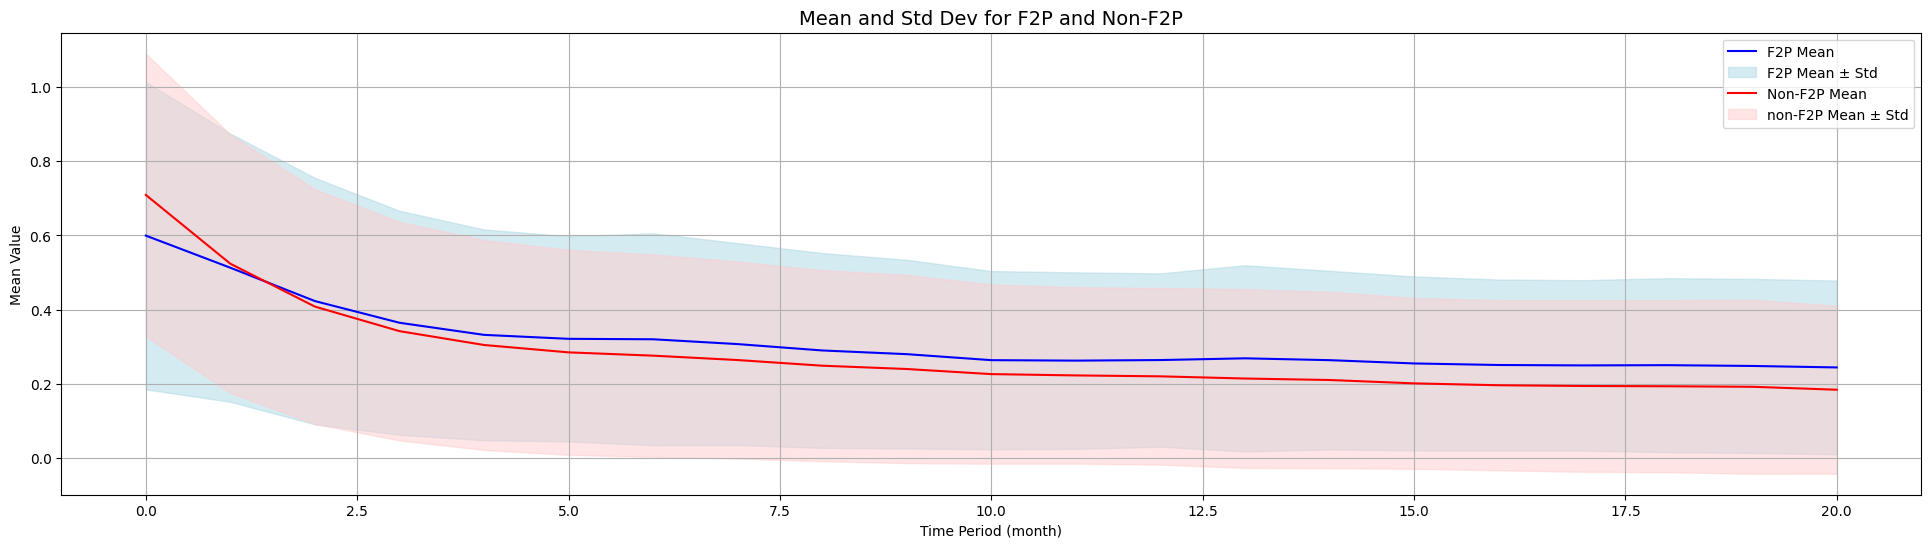

In [83]:
# 繪製 df_f2p 的 mean 折線圖和標準差通道
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))
df_std_mean_f2p_limited = df_std_mean_f2p.iloc[:21]  # 選取前 0-20 行
df_std_mean_nf2p_limited = df_std_mean_nf2p.iloc[:21]  # 選取前 0-20 行
plt.plot(df_std_mean_f2p_limited.index, df_std_mean_f2p_limited['mean'], color='blue', label='F2P Mean')
plt.fill_between(df_std_mean_f2p_limited.index, df_std_mean_f2p_limited['mean'] - df_std_mean_f2p_limited['std'], df_std_mean_f2p_limited['mean'] + df_std_mean_f2p_limited['std'], color='lightblue', alpha=0.5, label='F2P Mean ± Std')

# 繪製 df_nf2p 的 mean 折線圖
plt.plot(df_std_mean_nf2p_limited.index, df_std_mean_nf2p_limited['mean'], color='red', label='Non-F2P Mean')
plt.fill_between(df_std_mean_nf2p_limited.index, df_std_mean_nf2p_limited['mean'] - df_std_mean_nf2p_limited['std'], df_std_mean_nf2p_limited['mean'] + df_std_mean_nf2p_limited['std'], color='#ffcccc', alpha=0.5, label='non-F2P Mean ± Std')
# 添加標題和標籤
plt.title('Mean and Std Dev for F2P and Non-F2P', fontsize=14)
plt.xlabel('Time Period (month)')
plt.ylabel('Mean Value')

# 顯示圖例
plt.legend()

# 顯示圖表
plt.grid(True)
plt.show()


In [293]:
df_nf2p

,Counter-Strike: Source,Counter-Strike: Condition Zero,Dungeons 2,Pogostuck: Rage With Your Friends,Trouble Town,Roadworks 2,Pixel Ship Shooter,GHOST FAKE,ELDEN RING,PGA TOUR 2K21,...,LoveArena,DRAGON BALL Z: KAKAROT,BlazBlue: Continuum Shift Extend,Songs of Silence,Crestfallen: Medieval Survival,Trench Run,SUPER UFO FIGHTER,Flow Gear Racing,mean,std
time_period,,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.000000,0.769819,0.620667,0.000000e+00,0.0,0.0,1.0,1.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,0.171088,1.000000,0.0,0.533467,0.414576
30,0.919948,0.939526,0.117936,0.619804,8.945383e-07,0.0,0.0,0.0,0.998910,0.457151,...,0.0,0.225223,0.477115,0.104979,0.190872,1.000000,0.017252,0.0,0.294336,0.317238
60,0.800285,0.852051,0.069508,0.098335,1.035705e-01,0.0,0.0,0.0,0.377622,0.216042,...,0.0,0.073015,0.480535,0.000000,0.000000,0.611647,0.017252,0.0,0.227406,0.274622
90,0.676766,0.772104,0.066811,0.032361,0.000000e+00,0.0,0.0,0.5,0.134749,0.204715,...,0.0,0.072327,0.311292,0.120546,NaN,0.015385,0.017252,0.0,0.206324,0.270517
120,0.609246,0.722568,0.100090,0.078166,8.137755e-01,0.0,0.0,0.0,0.054946,0.230820,...,0.0,0.058770,0.578351,0.047384,NaN,0.015385,0.000000,0.0,0.189018,0.258390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,0.666161,0.048955,0.000234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.001499,NaN,NaN,NaN,NaN,NaN,0.094159,0.171432
3450,0.669442,0.112268,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.017217,NaN,NaN,NaN,NaN,NaN,0.119079,0.203857
3480,0.828426,0.121049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.031155,NaN,NaN,NaN,NaN,NaN,0.118032,0.208826
